In [4]:
from sklearn.datasets import make_blobs 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans

## Clustering

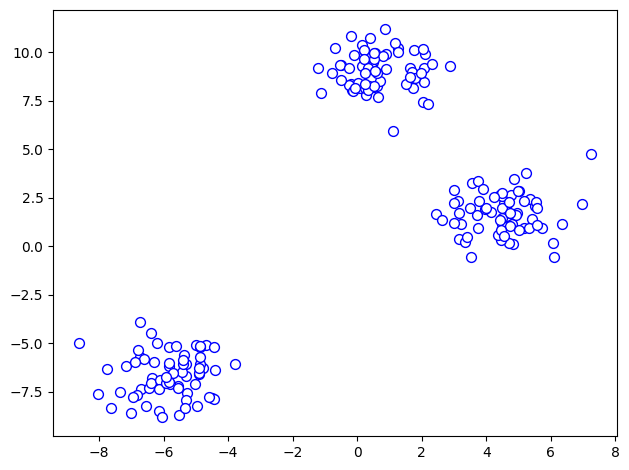

In [5]:
X,y = make_blobs(n_samples=200, n_features=2, centers=3,cluster_std=1.0, shuffle=True) 
plt.scatter(X[:,0],X[:,1],c='white',marker='o',edgecolors='blue',s=50) 
plt.tight_layout() 
plt.show()

## K-means Algorithm

In [12]:
KM = KMeans(n_clusters=3, init='random', n_init=10, max_iter=500, tol=1e-6)

In [17]:
y_KM = KM.fit_predict(X)

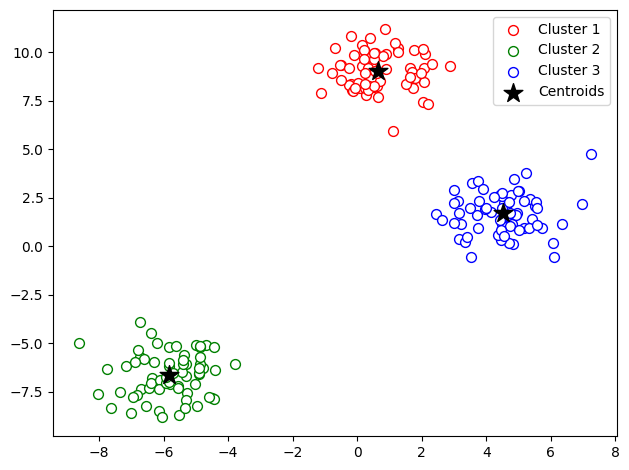

In [18]:
plt.scatter(X[y_KM==0,0],X[y_KM==0,1],s=50,c="white",edgecolor='r' ,label='Cluster 1') 
plt.scatter(X[y_KM==1,0],X[y_KM==1,1],s=50,c='white',edgecolor='g' ,label='Cluster 2') 
plt.scatter(X[y_KM==2,0],X[y_KM==2,1],s=50,c='white',edgecolor='b' ,label='Cluster 3') 
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=200 ,marker='*',c='black',label='Centroids') 
plt.legend(scatterpoints=1) 
plt.tight_layout() 
plt.show()

## Clustering with Sillhouetter Analysis

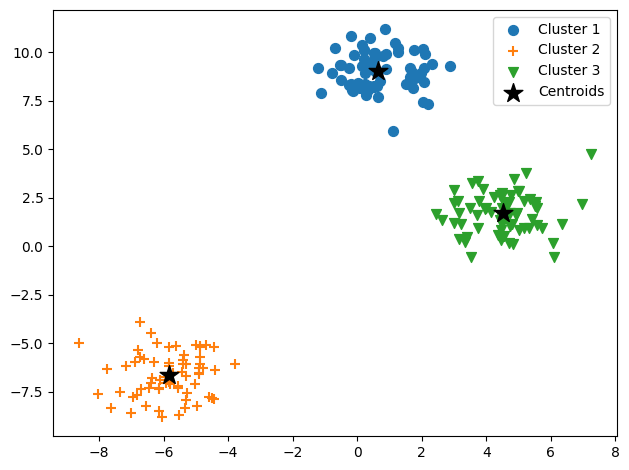

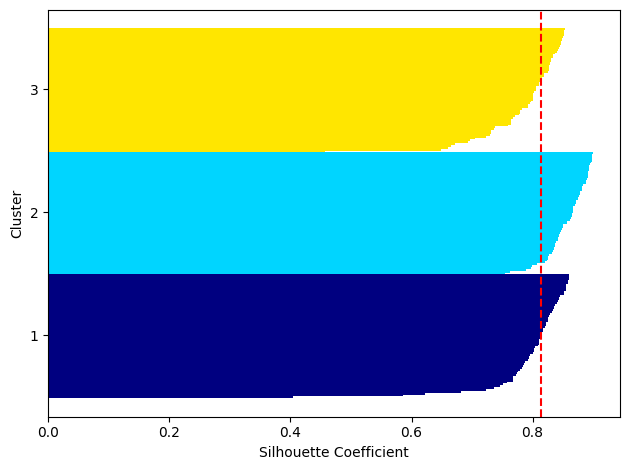

In [19]:
plt.scatter(X[y_KM==0,0],X[y_KM==0,1],s=50,marker='o',label='Cluster 1') 
plt.scatter(X[y_KM==1,0],X[y_KM==1,1],s=50,marker='+',label='Cluster 2') 
plt.scatter(X[y_KM==2,0],X[y_KM==2,1],s=50,marker='v',label='Cluster 3') 
plt.scatter(KM.cluster_centers_[:,0],KM.cluster_centers_[:,1],s=200,marker='*' ,c='black',label='Centroids') 
plt.legend(scatterpoints=1) 
plt.tight_layout() 
plt.show()

cluster_labels = np.unique(y_KM) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(X, y_KM, metric='euclidean') 
y_ax_lower, y_ax_upper = 0, 0 
yticks = [] 
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_KM == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.) 
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals) 
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel('Cluster') 
plt.xlabel('Silhouette Coefficient')

plt.tight_layout() 
plt.show()

### Clustering with Sillhouetter Analysis with 5 clustering

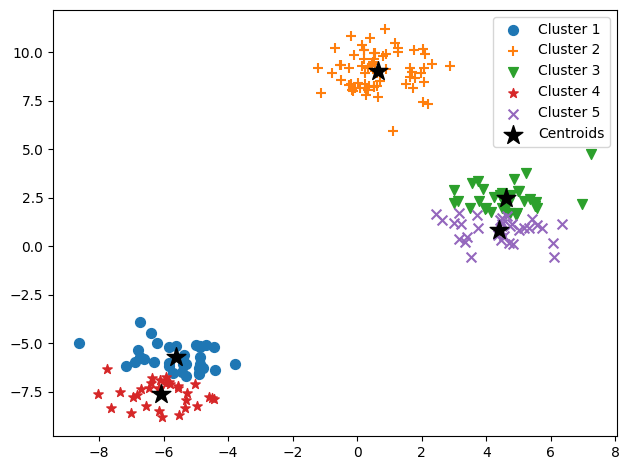

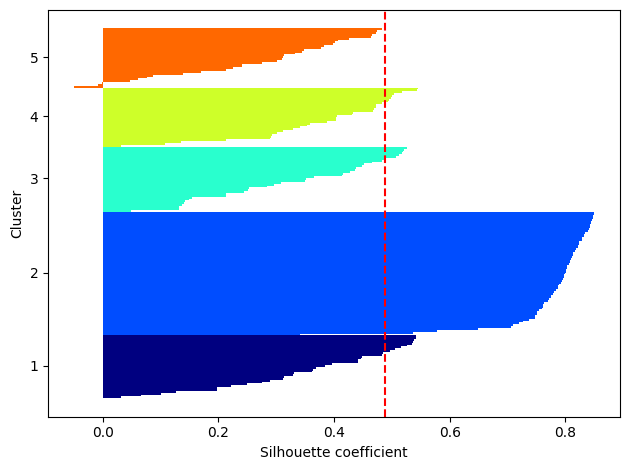

In [22]:
km = KMeans(n_clusters=5,init='k-means++', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],X[y_km==0,1],s=50,marker='o',label='Cluster 1') 
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=50,marker='+',label='Cluster 2') 
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=50,marker='v',label='Cluster 3') 
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=50,marker='*',label='Cluster 4') 
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=50,marker='x',label='Cluster 5')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=200,marker='*' ,c='black',label='Centroids')
plt.legend(scatterpoints=1) 
plt.tight_layout() 
plt.show()

cluster_labels = np.unique(y_km) 
n_clusters = cluster_labels.shape[0] 
silhouette_vals = silhouette_samples(X, y_km, metric='euclidean') 
y_ax_lower, y_ax_upper = 0, 0 
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c] 
    c_silhouette_vals.sort() 
    y_ax_upper += len(c_silhouette_vals) 
    color = cm.jet(float(i) / n_clusters) 
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

    yticks.append((y_ax_lower + y_ax_upper) / 2.) 
    y_ax_lower += len(c_silhouette_vals)

silhouette_avg = np.mean(silhouette_vals) 
plt.axvline(silhouette_avg, color="red", linestyle="--")

plt.yticks(yticks, cluster_labels + 1) 
plt.ylabel('Cluster') 
plt.xlabel('Silhouette coefficient')

plt.tight_layout() 
plt.show()

## Gaussian Mixture Model Clustering

In [24]:
import seaborn as sns 
from scipy.stats import norm
from sklearn.mixture import GaussianMixture

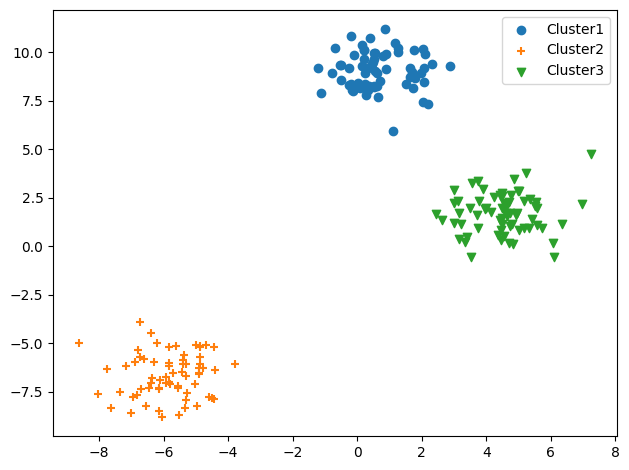

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

In [30]:
model = GaussianMixture(3).fit(X)

classes = model.predict(X)

mk = ['o','+','v']

for i in np.arange(3):
    j = (classes==i)
    plt.scatter(X[j,0],X[j,1],marker=mk[i],label='Cluster'+str(i+1))

plt.tight_layout()
plt.legend()
plt.show()

# Create histograms for clusters
# sns.histplot(data=df[df[’Gender’] == ’Male’], x=’Height’, bins=’auto’,color=’blue’, alpha=0.7, stat=’density’, label=’Male’)
ax = sns.histplot(X[classes==0,0],x= 'Feature 1', bins='auto', alpha=0.7, stat='frequency',label='Cluster1')
sns.histplot(X[classes==1,0],x= 'Feature 1', bins='auto', alpha=0.7, stat='frequency',label='Cluster2')
sns.histplot(X[classes==2,0],x= 'Feature 1', bins='auto', alpha=0.7, stat='frequency',label='Cluster3')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Feature 1')

plt.legend()
plt.show()